In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1)
for i in date:
    print(f'The most recent date in data set is {i}.')

The most recent date in data set is ('2017-08-23',).


In [10]:
#query for precipation in last 12 months of data
past_year = session.query(Measurement.date, Measurement.prcp).where(Measurement.date >= '2016-08-23')

#create lists of dates and precipitation
date_list = []
prcp_list = []

for i in past_year:
    #print(i)
    date = i[0]
    prcp = i[1]
    
    date_list.append(date)
    prcp_list.append(prcp)

#create data frame from date and precipitation lists and sort by date
prcp_df = pd.DataFrame(list(zip(date_list, prcp_list)), columns=['date', 'prcp']).sort_values(by='date')

#set index to date
prcp_df = prcp_df.set_index('date')

#remove NaN values from df
prcp_df = prcp_df.dropna(how='any')

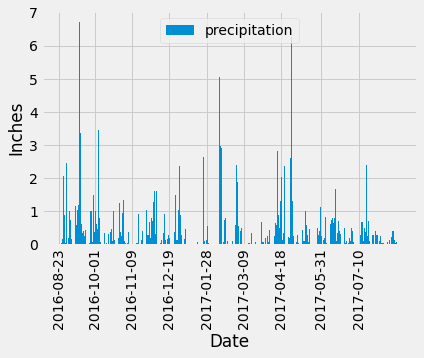

<Figure size 1800x1440 with 0 Axes>

In [11]:
#create plot
plt.bar(prcp_df.index, prcp_df['prcp'], linewidth=25)

plt.ylabel('Inches')
plt.xlabel('Date')

plt.xticks(rotation='vertical')
plt.xticks(['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28',
            '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10'  ])

legend = 'precipitation',

plt.legend(legend, loc='upper center')
plt.figure(figsize=(25,20))

plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).distinct().count()

print(f'The total number of stations in the dataset is {station_count}.')

The total number of stations in the dataset is 9.


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_group_count = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

station_group_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC0519281_temp = session.query(Measurement.station, func.max(Measurement.tobs),\
                                func.min(Measurement.tobs),\
                                func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

# max = func.max(USC0519281_temp).all()
# max

USC0519281_temp[0]

print(f'Station ID {USC0519281_temp[0][0]} had a max temperature of {USC0519281_temp[0][1]}, \
min temperature of {USC0519281_temp[0][2]}, and an average temperature of {USC0519281_temp[0][3]}.')

Station ID USC00519281 had a max temperature of 85.0, min temperature of 54.0, and an average temperature of 71.66378066378067.


In [16]:
# Find the most recent date in the data set for Station USC0519281.
date = session.query(Measurement.station, Measurement.date).\
    where(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).limit(1)

#date

for i in date:
    print(f'The most recent observation date for {i}.')

The most recent observation date for ('USC00519281', '2017-08-18').


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#query for past 12 month of temp data for station US00519281
US00519281_12mo = session.query(Measurement.date, Measurement.tobs).where(Measurement.date >= '2016-08-18')


#create data and temp lists
date_list = []
temp_list = []

for i in US00519281_12mo:
   
    date = i[0]
    temp = i[1]
    
    date_list.append(date)
    temp_list.append(temp)
    
#create data frame of temp and date
temp_df = pd.DataFrame(list(zip(date_list, temp_list)), columns=['date', 'temp'])

#removed NaN values from df
temp_df = temp_df.dropna(how='any')

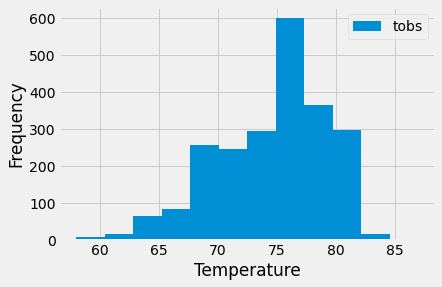

In [18]:
#Plot histogram of temp data

temp_df.hist(bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title('')

legend = 'tobs',
plt.legend(legend)

plt.show()

In [38]:
query = session.query(Measurement.station, Measurement.date,\
                                #func.max(Measurement.tobs),\
                                #func.min(Measurement.tobs),\
                                func.avg(Measurement.tobs),\
                                Measurement.tobs).\
                                where(Measurement.date >= '2017-05-06').where(Measurement.date <= '2017-05-07').all()
# max_temp = []

# for i in query:
#     max_temp = i[2]
#     min_temp = i[3]
    
#     temp_list.append(max_temp, min_temp)

query

[('USC00519397', '2017-05-06', 76.54545454545455, 79.0)]

# Close session

In [40]:
# Close Session
session.close()